In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
import datetime as dt
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'

# Let's open the files and get an initial understanding of what data is available

In [140]:
#Open files, care for ';' seperated data
origPrices = pd.read_csv('data/example_sprit_cut_prices.csv', sep=';')

In [141]:
#Get a quick understanding of what data is available
origPrices.head()

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01.000000,21
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01.000000,21
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02 09:06:01.000000,1
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539,1499,1339,2014-10-03 12:14:01.000000,21
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529,1489,1329,2014-10-03 14:14:01.000000,21


In [142]:
#consider size of matrices
origPrices.shape

(2189526, 6)

In [143]:
#Lets consider mathematical descriptions of the data
origPrices.describe()

#negative min and high max values for gas prices need to be explored

,E5,E10,DIESEL,CHANGED
count,2.189526e+06,2.189526e+06,2.189526e+06,2.189526e+06
mean,1.434320e+03,1.404088e+03,1.247491e+03,1.871165e+01
std,2.091502e+02,2.116844e+02,1.037774e+02,8.031150e+00
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00
25%,1.379000e+03,1.349000e+03,1.169000e+03,2.100000e+01
50%,1.459000e+03,1.429000e+03,1.239000e+03,2.100000e+01
75%,1.529000e+03,1.499000e+03,1.324000e+03,2.100000e+01
max,9.999000e+03,9.999000e+03,1.129000e+04,6.300000e+01


In [144]:
#Looks like we have all the data
origPrices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2189526 entries, 0 to 2189525
Data columns (total 6 columns):
STID            object
E5              int64
E10             int64
DIESEL          int64
DATE_CHANGED    object
CHANGED         int64
dtypes: int64(4), object(2)
memory usage: 100.2+ MB


# Lets start exploring the data

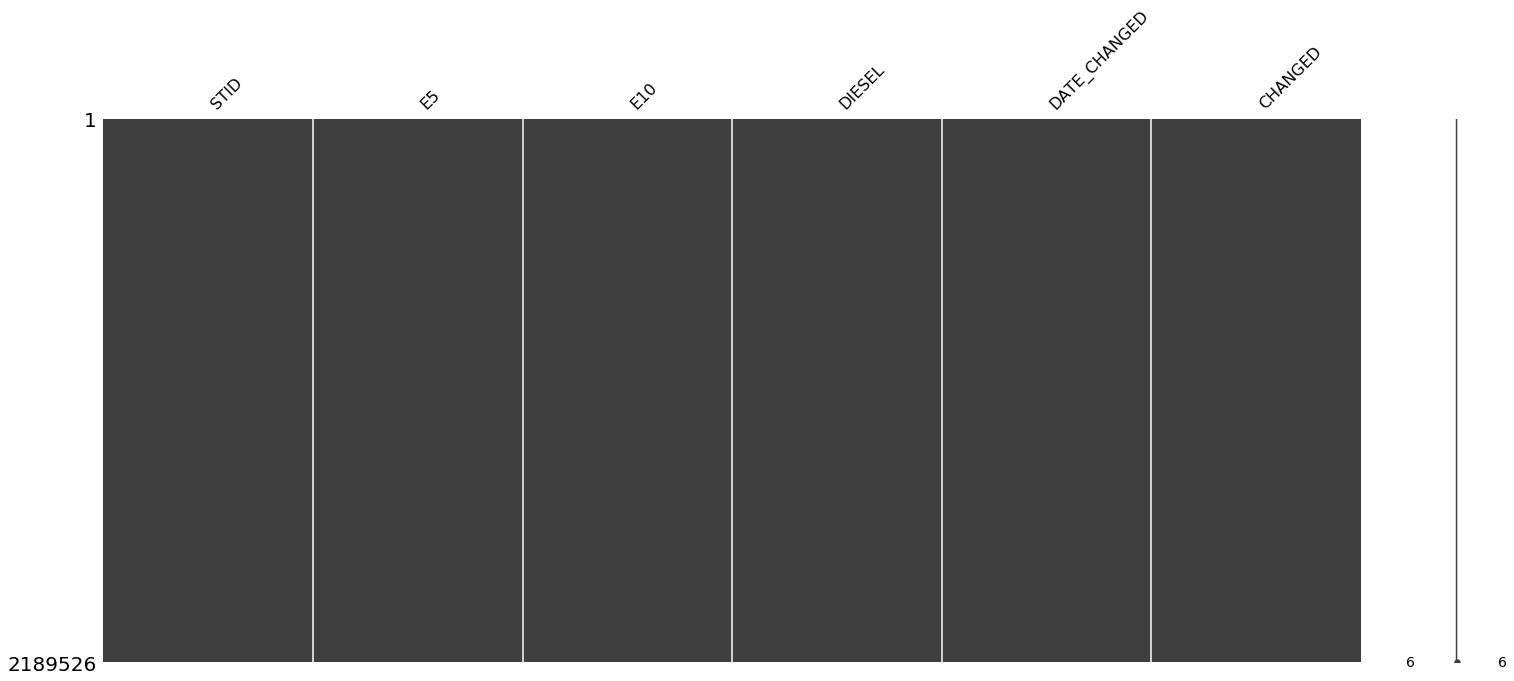

In [145]:
#No data missing here, that's good
ms.matrix(origPrices)

In [146]:
df = origPrices

In [147]:
%%capture
#Let's do something similar for the prices table

#Changed isnt useful
df.drop(['CHANGED'],axis=1,inplace=True,errors='ignore')
#Convert date changed into a date format
df['DATE'] = pd.to_datetime(df.DATE_CHANGED,format='%Y-%m-%d')
#format='%Y-%m-%d')
df.drop(['DATE_CHANGED'],axis=1,inplace=True,errors='ignore')
#dataPrices.info()

#2014-10-02 05:22:01.000000

In [148]:
##Strip time from date col
df['DATE'] = pd.to_datetime(df['DATE']).dt.date
##make the date col the index
df = df.set_index(pd.DatetimeIndex(df['DATE']))
df.head()

,STID,E5,E10,DIESEL,DATE
DATE,,,,,
2014-10-02,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02
2014-10-02,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02
2014-10-02,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02
2014-10-03,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539,1499,1339,2014-10-03
2014-10-03,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529,1489,1329,2014-10-03


In [149]:
##This gives us an average value for each day in our data set. 
##It helps clean up spurious data in our set.
df = df.groupby(df.DATE).mean()

In [150]:
##We can see the range of prices are ok. The prices are in cents per litre.
df.describe()

,E5,E10,DIESEL
count,479.000000,479.000000,479.000000
mean,1440.906180,1409.348652,1256.664143
std,95.232122,85.748202,87.702105
min,1245.673342,1226.134335,1101.263122
25%,1362.833020,1340.975118,1190.892881
50%,1451.014890,1425.163957,1236.722901
75%,1523.285646,1482.754989,1352.790413
max,1617.331210,1565.080679,1413.049540


In [151]:
df.head()

,E5,E10,DIESEL
DATE,,,
2014-06-08,1571.523992,1519.719770,1370.583493
2014-06-09,1595.126506,1540.228916,1392.698795
2014-06-10,1573.986616,1506.304971,1377.375717
2014-06-11,1581.633186,1515.724766,1378.265387
2014-06-12,1585.888145,1523.101338,1382.322180


# Lets consider some visual plots

Text(0.5,1,'data.corr()')

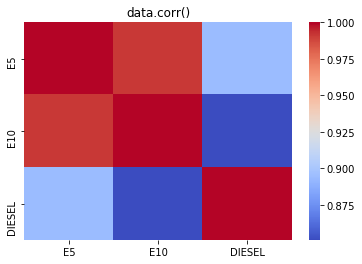

In [152]:
sns.heatmap(df.corr(),cmap='coolwarm')
plt.title('data.corr()')

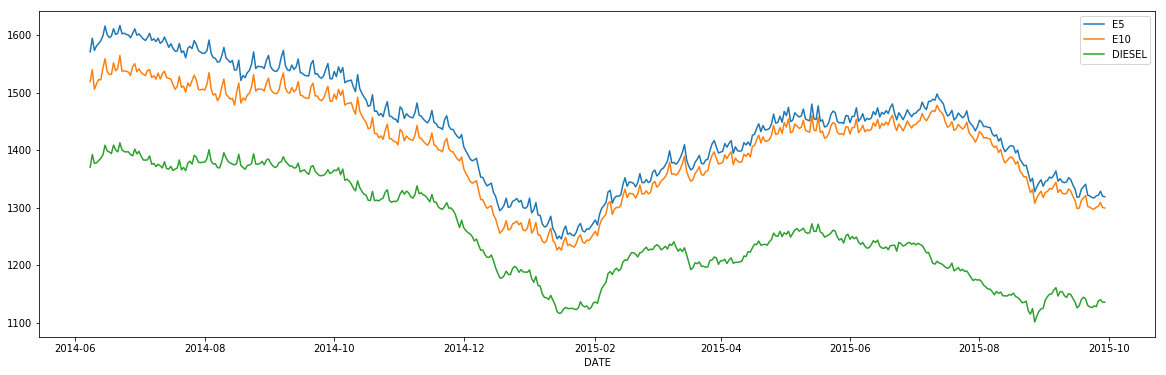

In [153]:
##Once plotted, we can see the trends of each gas type

df['E5'].plot(legend=True)
df['E10'].plot(legend=True)
df['DIESEL'].plot(figsize=(20,6), legend=True)

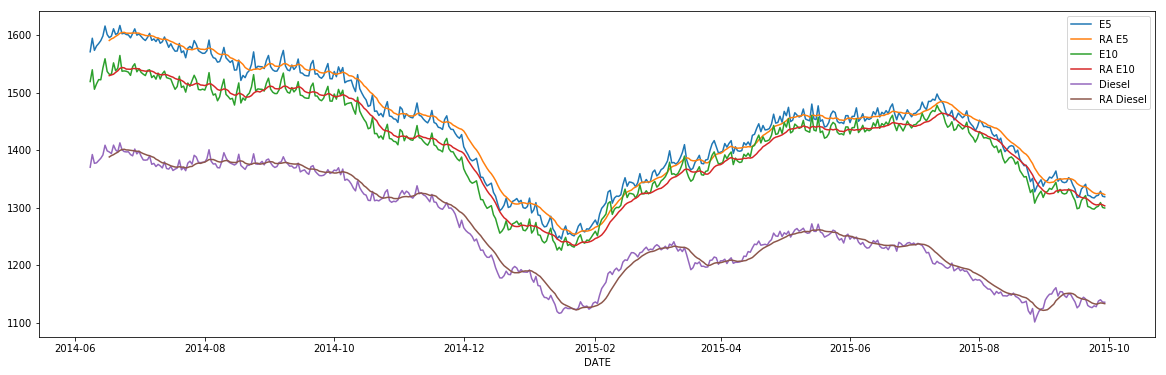

In [154]:
##Using rolling averages we can smooth out some of the sudden peaks and valleys

raE5 = df['E5'].rolling(10).mean() #10 day rolling average, E5
raE10 = df['E10'].rolling(10).mean() #10 day rolling average, E10
raDIESEL = df['DIESEL'].rolling(10).mean() #10 day rolling average, Diesel

DFra = pd.DataFrame({'E5': df['E5'], 'RA E5': raE5,
                     'E10': df['E10'], 'RA E10': raE10,
                     'Diesel': df['DIESEL'], 'RA Diesel': raDIESEL})
DFra.plot(figsize=(20, 6), legend=True, title='')

In [285]:
#DFtest = DFra.drop(columns=['E5', 'E10', 'Diesel'])
DFtest = DFra
DFtest = DFtest.drop(df.index[:10])
DFtest.head()
#DFE5test = DFtest.drop(columns=['RA E10', 'RA Diesel', 'E10', 'Diesel'])

,E5,RA E5,E10,RA E10,Diesel,RA Diesel
DATE,,,,,,
2014-06-18,1598.859120,1593.970170,1532.156204,1531.265516,1394.413248,1390.839259
2014-06-19,1611.583879,1595.615908,1552.271298,1532.469754,1409.087156,1392.478095
2014-06-20,1601.699903,1598.387236,1538.534366,1535.692694,1400.766215,1394.817145
2014-06-21,1603.804604,1600.604378,1542.765053,1538.396723,1397.375443,1396.728151
2014-06-22,1617.331210,1603.748685,1565.080679,1542.594657,1413.049540,1399.800887


In [290]:
DFtest['Corr E5'] = DFtest['E5'].rolling(window=10).corr(DFtest['RA E5'])
DFtest['Day to Day E5'] = DFtest['RA E5'] - DFtest['RA E5'].shift(1)
DFtest['Corr E10'] = DFtest['E10'].rolling(window=10).corr(DFtest['RA E10'])
DFtest['Day to Day E10'] = DFtest['RA E10'] - DFtest['RA E10'].shift(1)
DFtest['Corr Diesel'] = DFtest['Diesel'].rolling(window=10).corr(DFtest['RA Diesel'])
DFtest['Day to Day Diesel'] = DFtest['RA Diesel'] - DFtest['RA Diesel'].shift(1)
DFtest =DFtest.dropna()
X = DFtest

In [291]:
DFtest.tail()

,E5,RA E5,E10,RA E10,Diesel,RA Diesel,Corr,Open-Open,Corr E5,Day to Day E5,Corr E10,Day to Day E10,Corr Diesel,Day to Day Diesel
DATE,,,,,,,,,,,,,,
2015-09-25,1320.691887,1324.565344,1301.029942,1304.959778,1127.805860,1132.218026,0.348106,-0.824604,0.360883,-1.186971,0.355492,-1.177040,0.348106,-0.824604
2015-09-26,1321.860137,1324.953611,1302.780756,1305.406838,1137.627835,1133.398864,0.492292,1.180838,0.583930,0.388266,0.575726,0.447060,0.492292,1.180838
2015-09-27,1328.761317,1325.907101,1309.061728,1306.348279,1139.942798,1134.426986,0.590463,1.028122,0.723768,0.953491,0.722716,0.941441,0.590463,1.028122
2015-09-28,1320.055556,1324.670244,1300.566049,1305.125591,1135.831790,1133.988075,0.501207,-0.438911,0.713556,-1.236857,0.712703,-1.222688,0.501207,-0.438911
2015-09-29,1319.161366,1322.910438,1299.596585,1303.361350,1135.613994,1133.115709,0.223962,-0.872366,0.619703,-1.759807,0.617941,-1.764241,0.223962,-0.872366


In [292]:
# Dimensions of dataset
n = DFtest.shape[0] #number of entries
p = DFtest.shape[1] #number of cols

#DFtest = DFtest.values

In [332]:
X = DFtest
y = np.where (DFtest['RA E5'].shift(-1) > DFtest['RA E5'],1,-1)

In [333]:
split = int(0.7*len(df))

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
y_trainE10, y_testE10 = yE10[:split], yE10[split:]
y_trainDiesel, y_testDiesel = yDiesel[:split], yDiesel[split:]

In [334]:
model = LogisticRegression()

modelE5 = model.fit (X_train,y_train)
modelE10 = model.fit (X_train,y_train)
modelDiesel = model.fit (X_train,y_train)

In [335]:
probability = modelE5.predict_proba(X_test)

print (probability)

[[0.25637065 0.74362935]
 [0.17072139 0.82927861]
 [0.33787443 0.66212557]
 [0.47033135 0.52966865]
 [0.6072114  0.3927886 ]
 [0.41015905 0.58984095]
 [0.28160941 0.71839059]
 [0.37506687 0.62493313]
 [0.20242356 0.79757644]
 [0.31917316 0.68082684]
 [0.14289807 0.85710193]
 [0.28429053 0.71570947]
 [0.11748369 0.88251631]
 [0.20026214 0.79973786]
 [0.09677503 0.90322497]
 [0.08666995 0.91333005]
 [0.60373946 0.39626054]
 [0.74188948 0.25811052]
 [0.59302668 0.40697332]
 [0.48079949 0.51920051]
 [0.62169515 0.37830485]
 [0.35848877 0.64151123]
 [0.2016407  0.7983593 ]
 [0.28923139 0.71076861]
 [0.55432523 0.44567477]
 [0.39309056 0.60690944]
 [0.249566   0.750434  ]
 [0.08014736 0.91985264]
 [0.17785416 0.82214584]
 [0.0434045  0.9565955 ]
 [0.07826581 0.92173419]
 [0.16821685 0.83178315]
 [0.15563886 0.84436114]
 [0.083801   0.916199  ]
 [0.05075552 0.94924448]
 [0.12430848 0.87569152]
 [0.06039301 0.93960699]
 [0.25229807 0.74770193]
 [0.44659813 0.55340187]
 [0.69044899 0.30955101]


In [336]:
predicted = model.predict(X_test)
predicted

array([ 1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1, -1, -1])

In [337]:
from sklearn.metrics import confusion_matrix, classification_report

In [338]:
print(confusion_matrix(y_testDiesel, predicted))

[[61 31]
 [ 7 17]]


In [339]:
from sklearn.metrics import classification_report

In [340]:
print(classification_report(y_testDiesel,predicted))

             precision    recall  f1-score   support

         -1       0.90      0.66      0.76        92
          1       0.35      0.71      0.47        24

avg / total       0.78      0.67      0.70       116



AttributeError: 'numpy.ndarray' object has no attribute 'plot'